In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("./hly4935.csv", skiprows=23, low_memory=False, nrows=1000)

In [30]:
df['datetime'] = pd.to_datetime(df['date'])

In [31]:
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,datetime
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,25,81,0.0,35000,32,5,1996-04-10 14:00:00
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,25,82,0.0,40000,45,5,1996-07-31 08:00:00
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,80,81,0.0,8000,32,7,1996-07-31 09:00:00
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,25,82,0.0,28000,35,6,1996-07-31 10:00:00
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,2,11,0.0,40000,40,6,1996-07-31 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10-sep-1996 18:00,0,0.0,0,13.7,0,12.3,11.1,13.2,84,...,10,2,340,2,11,0.1,30000,59,7,1996-09-10 18:00:00
996,10-sep-1996 19:00,0,0.0,0,12.8,0,12.0,11.3,13.4,91,...,9,2,340,2,11,0.0,24000,55,7,1996-09-10 19:00:00
997,10-sep-1996 20:00,0,0.0,0,12.4,0,11.7,11.1,13.2,92,...,7,2,340,2,11,0.0,24000,34,7,1996-09-10 20:00:00
998,10-sep-1996 21:00,0,0.0,0,12.2,0,11.6,11.1,13.2,93,...,6,2,340,2,11,0.0,24000,34,7,1996-09-10 21:00:00


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='datetime', ylabel='temp'>

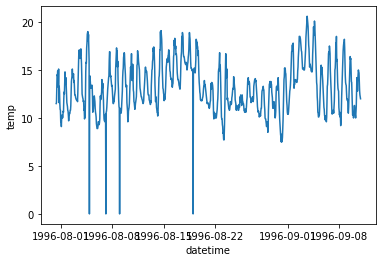

In [33]:
sns.lineplot(x="datetime", y="temp", data = df[1:])

### Creating time series

In [34]:
# 72 hours from midnight 1st Jan 2011
rng = pd.date_range('1/1/2011', periods=72, freq='H')
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               '2011-01-02 00:00:00', '2011-01-02 01:00:00',
               '2011-01-02 02:00:00', '2011-01-02 03:00:00',
               '2011-01-02 04:00:00', '2011-01-02 05:00:00',
               '2011-01-02 06:00:00', '2011-01-02 07:00:00',
               '2011-01-

In [44]:
#creates new dataframe with random data and index is timeseries above
ts = pd.DataFrame(np.random.randn(len(rng)), index=rng)
ts

,0
2011-01-01 00:00:00,-1.297901
2011-01-01 01:00:00,-1.310238
2011-01-01 02:00:00,-0.079739
2011-01-01 03:00:00,0.448318
2011-01-01 04:00:00,1.081747
...,...
2011-01-03 19:00:00,1.320468
2011-01-03 20:00:00,-0.882271
2011-01-03 21:00:00,-1.858975
2011-01-03 22:00:00,-0.862423


##### Poisson distribution

In [41]:
# 5 is average number of events
# 10 is the amount returned
np.random.poisson(5,10)

array([5, 4, 1, 2, 5, 5, 4, 2, 6, 4])

In [54]:
# new dataframe with random poisson distributed data to simulate hospital admission
# and index is timeseries above - timestamp
# 10 is the average number of admissions per hour
total_admissions = np.random.poisson(10, len(rng))
# alcohol_admissions = total_admissions * 0.5
ts2 = pd.DataFrame(total_admissions, index=rng, columns=['Admissions'])
ts2
# maybe create another column for cause of admissions - alcohol maybe?

,Admissions
2011-01-01 00:00:00,10
2011-01-01 01:00:00,15
2011-01-01 02:00:00,10
2011-01-01 03:00:00,9
2011-01-01 04:00:00,11
...,...
2011-01-03 19:00:00,14
2011-01-03 20:00:00,6
2011-01-03 21:00:00,15
2011-01-03 22:00:00,9


<AxesSubplot:ylabel='Admissions'>

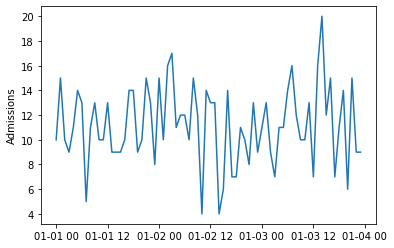

In [58]:
sns.lineplot(x=rng, y="Admissions", data = ts2)

#### Accessing and Grouping

In [59]:
ts2.mean()

Admissions    11.180556
dtype: float64

In [61]:
ts2.loc['2011-01-03 21:00:00']

Admissions    15
Name: 2011-01-03 21:00:00, dtype: int64

In [64]:
ts2.loc['2011-01-02 21:00:00':'2011-01-03 21:00:00']

,Admissions
2011-01-02 21:00:00,8
2011-01-02 22:00:00,13
2011-01-02 23:00:00,9
2011-01-03 00:00:00,11
2011-01-03 01:00:00,13
2011-01-03 02:00:00,9
2011-01-03 03:00:00,7
2011-01-03 04:00:00,11
2011-01-03 05:00:00,11
2011-01-03 06:00:00,14


In [65]:
ts2.loc['2011-01-02 21:00:00':'2011-01-03 21:00:00'].mean()

Admissions    11.6
dtype: float64

In [67]:
# daily average
ts2.resample('D').mean()

,Admissions
2011-01-01,11.000000
2011-01-02,10.958333
2011-01-03,11.583333
